# Internet Speed Test

Measure and report internet speed test using speedtest.net. Chart results over time.

Used for sampling our overloaded internet during COVID-19 shutdowns.

Requires the [speedtest-cli](https://github.com/sivel/speedtest-cli) package. The [derekwlms/jupyter-notebook](https://hub.docker.com/repository/docker/derekwlms/jupyter-notebook) docker image includes this.

In [1]:
import pandas as pd
import speedtest
from IPython.display import Image

results = []

In [50]:
def run_speed_test():
    s = speedtest.Speedtest()
    s.get_servers([])
    s.get_best_server()
    s.download(threads=None)
    s.upload(threads=None)
    return s

In [51]:
# Run the speed test and add to the results. 
# Re-run this over time (can Run All Below the above cell)
speed_test = run_speed_test()
results_dict = speed_test.results.dict()
results.append( { "timestamp": results_dict['timestamp'], 
                  "download": results_dict['download'] / 1024 / 1024, 
                  "upload": results_dict['upload'] / 1024 / 1024 } )
results_dict

{'download': 41905048.424063,
 'upload': 2283475.846160167,
 'ping': 25.39,
 'server': {'url': 'http://suw1sp1.qtsdatacenters.com:8080/speedtest/upload.php',
  'lat': '34.0515',
  'lon': '-84.0713',
  'name': 'Suwanee, GA',
  'country': 'United States',
  'cc': 'US',
  'sponsor': 'QTS Data Centers',
  'id': '13220',
  'host': 'suw1sp1.qtsdatacenters.com:8080',
  'd': 62.955008112697634,
  'latency': 25.39},
 'timestamp': '2020-04-18T13:57:00.146047Z',
 'bytes_sent': 4104192,
 'bytes_received': 52626996,
 'share': None,
 'client': {'ip': '98.20.164.79',
  'lat': '34.1683',
  'lon': '-83.4022',
  'isp': 'Windstream Communications',
  'isprating': '3.7',
  'rating': '0',
  'ispdlavg': '0',
  'ispulavg': '0',
  'loggedin': '0',
  'country': 'US'}}

In [52]:
# Show an image of the latest speed test
results_image = speed_test.results.share()
Image(url=results_image)

,timestamp,download,upload
0,2020-04-18T13:30:34.358994Z,39.833856,2.081320
1,2020-04-18T13:31:47.875823Z,37.697151,2.610521
2,2020-04-18T13:32:50.414639Z,38.179496,2.164360
3,2020-04-18T13:33:38.487074Z,39.980631,2.061833
4,2020-04-18T13:35:35.891319Z,39.869553,2.191518
5,2020-04-18T13:36:55.613090Z,36.980460,2.466845
6,2020-04-18T13:42:41.475856Z,39.734542,2.123014
7,2020-04-18T13:43:36.804001Z,40.204244,2.357362
8,2020-04-18T13:44:48.881044Z,39.986973,1.980823
9,2020-04-18T13:49:05.446075Z,40.113069,2.316432


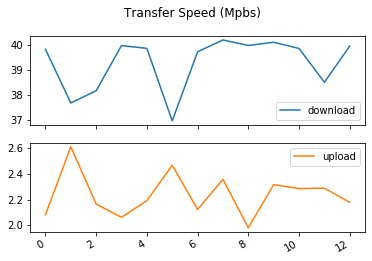

In [53]:
# Plot the history of results
df = pd.DataFrame(results)
axes = df.plot(y=['download', 'upload'], subplots=True, use_index=True, title='Transfer Speed (Mpbs)')
df.head(15)